In [2]:
import pandas as pd
import numpy as np
import requests
import json
import csv
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec


In [3]:
file = "nyc_pr_20k_plus_colorsprice.csv"

In [4]:
nyc_pr = pd.read_csv(file)
nyc_pr

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ,boro_color
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2,blue
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1,green
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2,aqua
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2,green
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1,green
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27,1,green
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3,2,red
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10,1,red
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4,1,red
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142,2,aqua


In [5]:
nyc_pr1 = nyc_pr[(nyc_pr['Price'].str.len() != 0)]
nyc_pr1.head(50)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ,boro_color
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2,blue
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1,green
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2,aqua
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2,green
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1,green
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27,1,green
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3,2,red
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10,1,red
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4,1,red
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142,2,aqua


In [8]:
nyc_pr1["SCORE"].max()

108.0

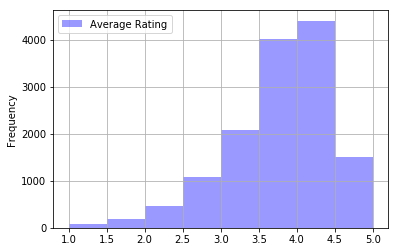

In [9]:
plt_hist = nyc_pr1.plot(kind="hist", x="SCORE",bins=[1,1.5,2,2.5,3,3.5,4,4.5,5], y="Average Rating",grid=True,color="blue",alpha=.4,)

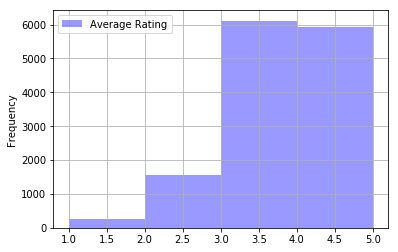

In [10]:
plt_hist3 = nyc_pr1.plot(kind="hist", x="SCORE",bins=[1,2,3,4,5], y="Average Rating",grid=True,color="blue",alpha=.4,)

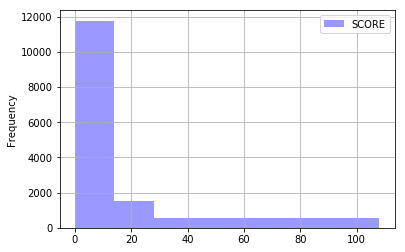

In [38]:
plt_hist2 = nyc_pr1.plot(kind="hist", x="Average Rating",bins=[0,14,28,108], y="SCORE",grid=True,color="blue",alpha=.4,)

In [39]:
scale = nyc_pr1["Review_Count"]

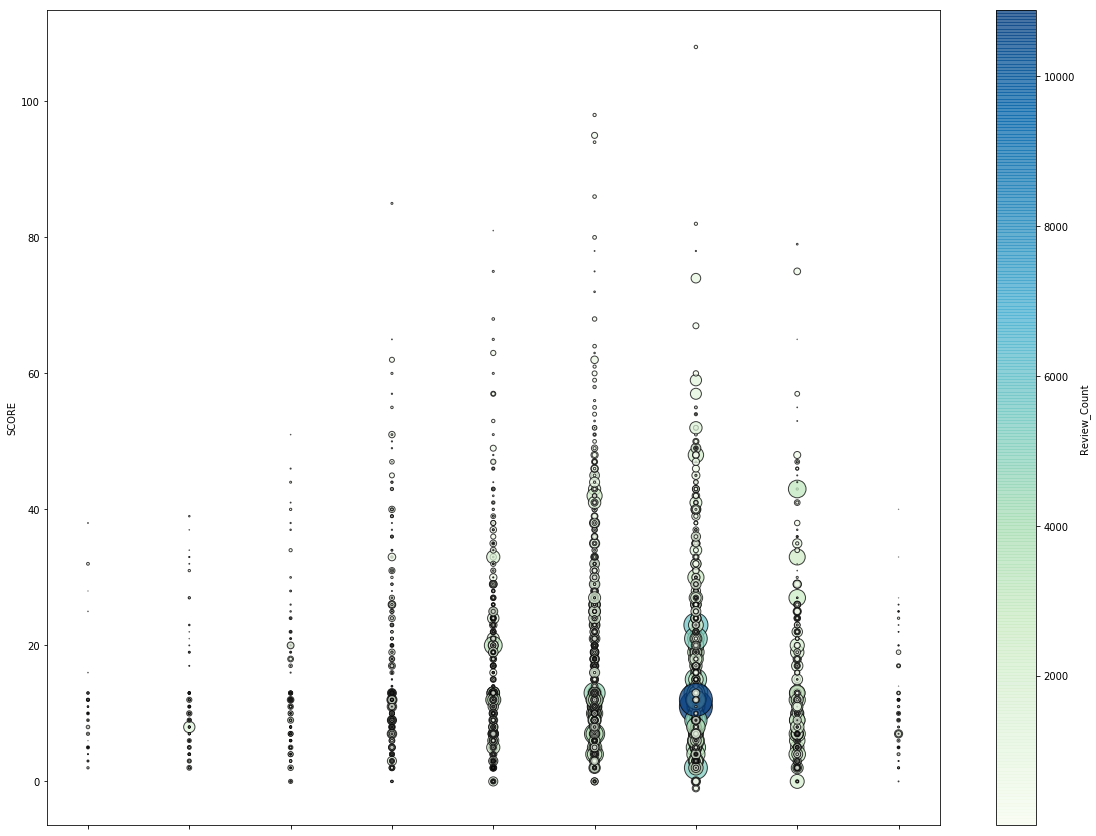

In [40]:
nyc_pr1.plot(kind="scatter", x="Average Rating", y="SCORE",s=scale/10,marker="o", edgecolors="black",
             alpha=.75,figsize=[20,15],c="Review_Count",colormap='GnBu')

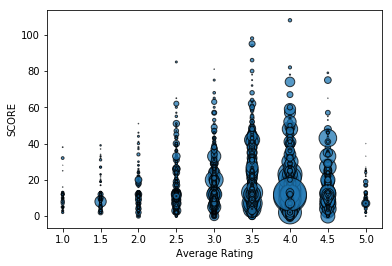

In [41]:
nyc_pr1.plot(kind="scatter", x="Average Rating", y="SCORE",s=scale/10,marker="o", edgecolors="black",alpha=.75)

(array([[3.000e+01, 3.900e+01, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [8.900e+01, 7.900e+01, 7.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.300e+02, 2.200e+02, 1.700e+01, 5.000e+00, 3.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.880e+02, 5.000e+02, 5.500e+01, 1.800e+01, 1.100e+01, 4.000e+00,
         1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.780e+02, 1.097e+03, 1.560e+02, 4.000e+01, 1.300e+01, 4.000e+00,
         3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.357e+03, 2.207e+03, 3.240e+02, 8.200e+01, 3.300e+01, 1.100e+01,
         3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00],
        [1.607e+03, 2.389e+03, 3.030e+02, 6.600e+01, 3.500e+01, 7.000e+00,
         2.000e+00, 2.

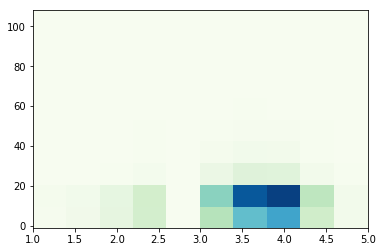

In [42]:
plt.hist2d(x=nyc_pr1["Average Rating"],y=nyc_pr1["SCORE"],cmap='GnBu')

In [44]:
nyc_pr1["BORO"].value_counts()

MANHATTAN        6089
BROOKLYN         3350
QUEENS           2958
BRONX             924
STATEN ISLAND     512
Missing             4
Name: BORO, dtype: int64

In [45]:
nyc_small = nyc_pr1.loc[:,["BORO","SCORE","Average Rating","Review_Count","PriceQ"]]
nyc_small = nyc_small.groupby("BORO")
nyc_small.head()

,BORO,SCORE,Average Rating,Review_Count,PriceQ
0,BRONX,5.0,4.0,41,2
1,BROOKLYN,13.0,2.0,36,1
2,MANHATTAN,12.0,3.5,99,2
3,BROOKLYN,13.0,3.5,37,2
4,BROOKLYN,13.0,4.5,31,1
5,BROOKLYN,13.0,3.5,27,1
6,QUEENS,25.0,4.5,3,2
7,QUEENS,11.0,4.5,10,1
8,QUEENS,5.0,4.0,4,1
9,MANHATTAN,19.0,3.0,142,2


In [49]:
nyc_pr1 = nyc_pr1.drop([9153,9168,11694,13594])
#plt1 = plt.scatter(nyc_small["Average Rating"]["BORO"], nyc_small["Average Rating"]["BORO"], marker="o", facecolors="gold", edgecolors="black",s=nyc_pr1["Review_Count"] / 10,alpha=.75)
#plt2 = plt.scatter(nyc_small["Average Rating"]["BORO"], nyc_small["Average Rating"]["BORO"], marker="o", facecolors="lightcoral", edgecolors="black",s=nyc_pr1["Review_Count"] / 10,alpha=.75)
#plt3 = plt.scatter(nyc_small["Average Rating"]["BORO"], nyc_small["Average Rating"]["BORO"], marker="o", facecolors="lightskyblue", edgecolors="black",s=nyc_pr1["Review_Count"]/10,alpha=.5)

In [50]:
nyc_pr1["BORO"].value_counts()

MANHATTAN        6089
BROOKLYN         3350
QUEENS           2958
BRONX             924
STATEN ISLAND     512
Name: BORO, dtype: int64

In [7]:
manhat_df = nyc_pr1.loc[nyc_pr1["BORO"]=="MANHATTAN"]
queens_df = nyc_pr1.loc[nyc_pr1["BORO"]=="QUEENS"]
brooklyn_df = nyc_pr1.loc[nyc_pr1["BORO"]=="BROOKLYN"]
bronx_df = nyc_pr1.loc[nyc_pr1["BORO"]=="BRONX"]
staten_df = nyc_pr1.loc[nyc_pr1["BORO"]=="STATEN ISLAND"]

manhat_df = manhat_df.reset_index()
queens_df = queens_df.reset_index()
brooklyn_df = brooklyn_df.reset_index()
bronx_df = bronx_df.reset_index()
staten_df = staten_df.reset_index()

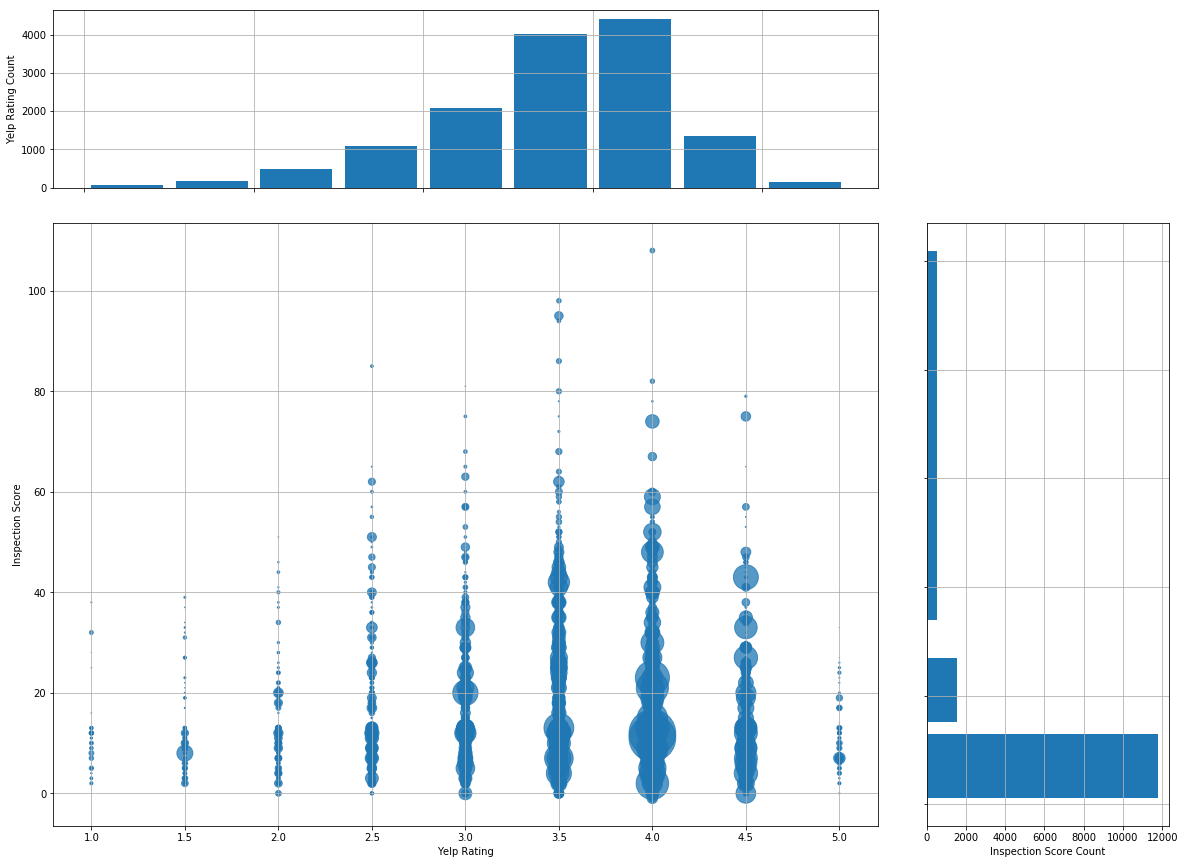

In [8]:
df4 = pd.DataFrame({'a': manhat_df["Average Rating"], 'b': manhat_df["SCORE"],
                    'c': queens_df["Average Rating"], 'd': queens_df["SCORE"],
                    'e': brooklyn_df["Average Rating"], 'f': brooklyn_df["SCORE"],
                    'g': bronx_df["Average Rating"], 'h': bronx_df["SCORE"],
                    'i': staten_df["Average Rating"], 'j': staten_df["SCORE"]}, 
                   columns=['a', 'b', 'c','d','e','f','g','h','i','j'])

fig = plt.figure(figsize=[20,15])

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

#manhat_plt = ax_joint.scatter(x=df4["a"],y=df4["b"],alpha=0.75,s=manhat_df["Review_Count"]/5)
#queens_plt = ax_joint.scatter(x=df4["c"],y=df4["d"],alpha=0.75,s=queens_df["Review_Count"]/5)
#brooklyn_plt = ax_joint.scatter(x=df4["e"],y=df4["f"],alpha=0.75,s=brooklyn_df["Review_Count"]/5)
#bronx_plt = ax_joint.scatter(x=df4["g"],y=df4["h"],alpha=0.75,s=bronx_df["Review_Count"]/5)
#staten_plt = ax_joint.scatter(x=df4["i"],y=df4["j"],alpha=0.75,s=staten_df["Review_Count"]/5)

ax_joint.scatter(x=nyc_pr1["Average Rating"], y=nyc_pr1["SCORE"],alpha=0.75,s=nyc_pr1["Review_Count"]/5)

#ax_joint.scatter(x=df4["a"],y=df4["b"],alpha=0.75,s=manhat_df["Review_Count"]/5)

ax_marg_x.hist(nyc_pr1["Average Rating"],bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5],rwidth=0.85)

#ax_marg_x.hist(df4["a"],bins=[1,2,3,4,5],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_x.hist(df4["c"],bins=[1,2,3,4,5],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_x.hist(df4["e"],bins=[1,2,3,4,5],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_x.hist(df4["g"],bins=[1,2,3,4,5],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_x.hist(df4["i"],bins=[1,2,3,4,5],rwidth=0.85,histtype='barstacked',alpha=0.75)

ax_marg_y.hist(nyc_pr1["SCORE"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85)

#ax_marg_y.hist(df4["b"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_y.hist(df4["d"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_y.hist(df4["f"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_y.hist(df4["h"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85,histtype='barstacked',alpha=0.75)
#ax_marg_y.hist(df4["j"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85,histtype='barstacked',alpha=0.75)

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_joint.set_xlabel('Yelp Rating')
ax_joint.set_ylabel('Inspection Score')

ax_marg_y.set_xlabel('Inspection Score Count')
ax_marg_x.set_ylabel('Yelp Rating Count')

#leg = ax_joint.legend(("Manhatten","Queens","Brooklyn","Bronx","Staten Island"),loc='best',title="Boroughs")
#leg.legendHandles[0]._sizes = [30]
#leg.legendHandles[1]._sizes = [30]
#leg.legendHandles[2]._sizes = [30]
#leg.legendHandles[3]._sizes = [30]
#leg.legendHandles[4]._sizes = [30]

ax_marg_x.grid()
ax_marg_y.grid()
ax_joint.grid()

plt.savefig("plt_score_vs_rating_scatter_and_hist.png")

In [9]:
#manh = df4.plot.scatter(x ='a', y= 'b',alpha=0.5)
#quee = df4.plot.scatter(x ='c', y= 'd',alpha=0.5)
#brok = df4.plot.scatter(x ='e', y= 'f',alpha=0.5)
#bron = df4.plot.scatter(x ='g', y= 'h',alpha=0.5)
#stat = df4.plot.scatter(x ='i', y= 'j',alpha=0.5)

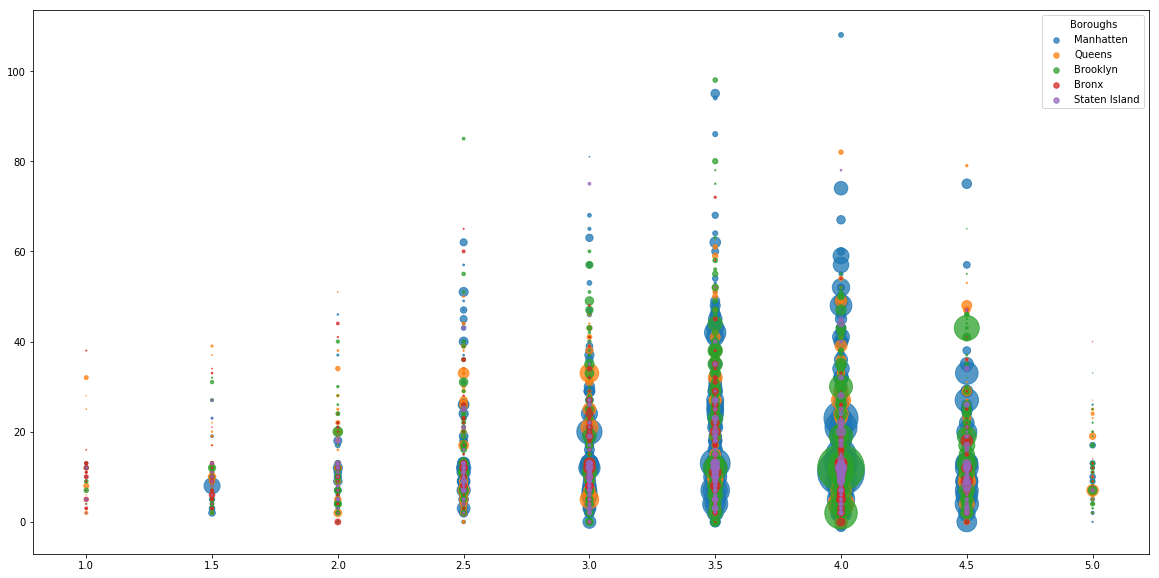

In [77]:
df4 = pd.DataFrame({'a': manhat_df["Average Rating"], 'b': manhat_df["SCORE"],
                    'c': queens_df["Average Rating"], 'd': queens_df["SCORE"],
                    'e': brooklyn_df["Average Rating"], 'f': brooklyn_df["SCORE"],
                    'g': bronx_df["Average Rating"], 'h': bronx_df["SCORE"],
                    'i': staten_df["Average Rating"], 'j': staten_df["SCORE"]}, 
                   columns=['a', 'b', 'c','d','e','f','g','h','i','j'])

plt.figure(figsize=[20,10])

manhat_plt3 = plt.scatter(x=df4["a"],y=df4["b"],alpha=0.75,s=manhat_df["Review_Count"]/5)
queens_plt3 = plt.scatter(x=[x for x in df4['c'] if str(x) != 'nan'],y=[x for x in df4['d'] if str(x) != 'nan'],alpha=0.75,s=queens_df["Review_Count"]/5)
brooklyn_plt3 = plt.scatter(x=[x for x in df4['e'] if str(x) != 'nan'],y=[x for x in df4['f'] if str(x) != 'nan'],alpha=0.75,s=brooklyn_df["Review_Count"]/5)
bronx_plt3 = plt.scatter(x=[x for x in df4['g'] if str(x) != 'nan'],y=[x for x in df4['h'] if str(x) != 'nan'],alpha=0.75,s=bronx_df["Review_Count"]/5)
staten_plt3 = plt.scatter(x=[x for x in df4['i'] if str(x) != 'nan'],y=[x for x in df4['j'] if str(x) != 'nan'],alpha=0.75,s=staten_df["Review_Count"]/5)

leg = plt.legend(("Manhatten","Queens","Brooklyn","Bronx","Staten Island"),loc='best',title="Boroughs")
leg.legendHandles[0]._sizes = [30]
leg.legendHandles[1]._sizes = [30]
leg.legendHandles[2]._sizes = [30]
leg.legendHandles[3]._sizes = [30]
leg.legendHandles[4]._sizes = [30]

plt.savefig("plt3_score_vs_rating.png")

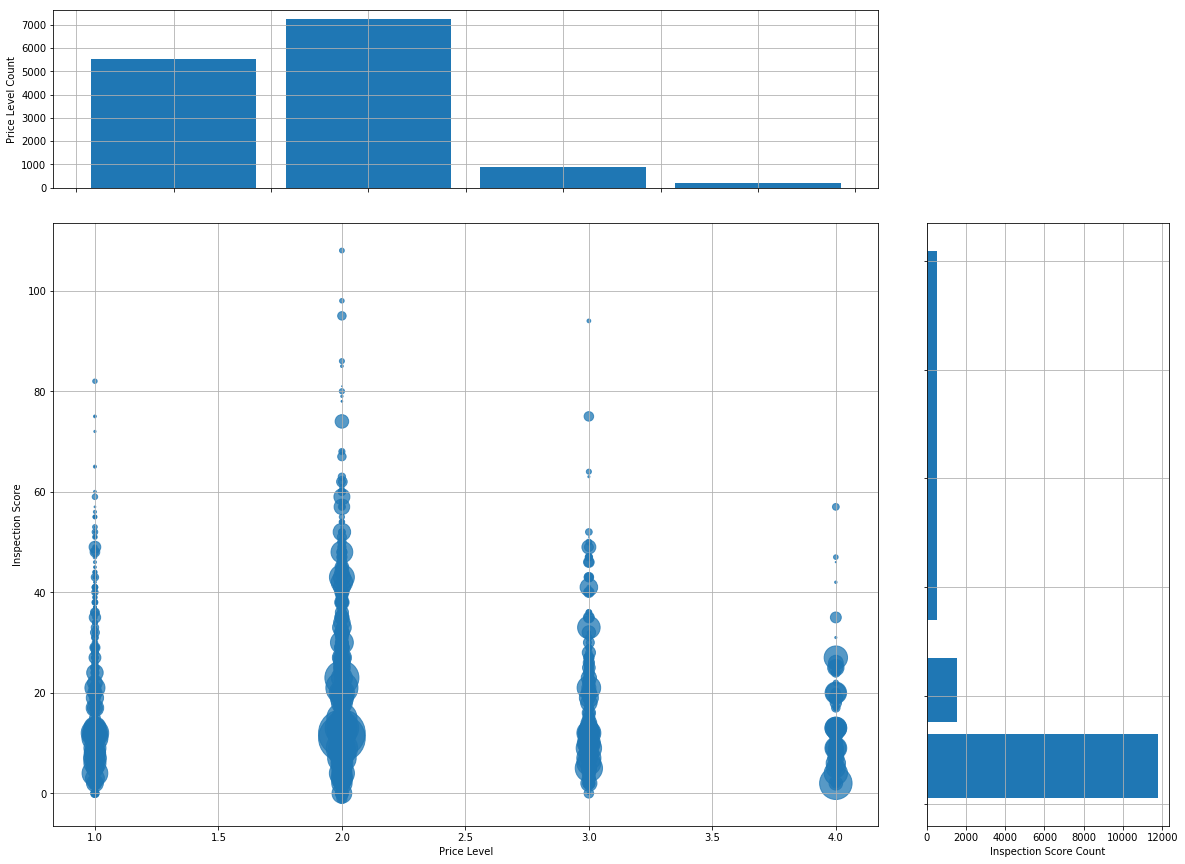

In [12]:
#df5 = pd.DataFrame({'a': manhat_df["PriceQ"], 'b': manhat_df["SCORE"],
#                    'c': queens_df["PriceQ"], 'd': queens_df["SCORE"],
#                    'e': brooklyn_df["PriceQ"], 'f': brooklyn_df["SCORE"],
#                    'g': bronx_df["PriceQ"], 'h': bronx_df["SCORE"],
#                    'i': staten_df["PriceQ"], 'j': staten_df["SCORE"]}, 
#                   columns=['a', 'b', 'c','d','e','f','g','h','i','j'])


fig = plt.figure(figsize=[20,15])

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.grid()
ax_marg_x.grid()
ax_marg_y.grid()

ax_joint.scatter(x=nyc_pr1["PriceQ"],y=nyc_pr1["SCORE"],alpha=.75,s=nyc_pr1["Review_Count"]/5)
ax_marg_x.hist(nyc_pr1["PriceQ"],bins=[1,2,3,4,5],rwidth=0.85)
ax_marg_y.hist(nyc_pr1["SCORE"],orientation="horizontal",bins=[0,14,28,108],rwidth=0.85)


plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_joint.set_xlabel('Price Level')
ax_joint.set_ylabel('Inspection Score')

ax_marg_y.set_xlabel('Inspection Score Count')
ax_marg_x.set_ylabel('Price Level Count')

plt.savefig("plt4_score_vs_price.png")

#manhat_plt2 = plt.scatter(x=df5["a"],y=df5["b"],alpha=0.75,s=manhat_df["Review_Count"]/5)
#queens_plt2 = plt.scatter(x=[x for x in df5['c'] if str(x) != 'nan'],y=[x for x in df5['d'] if str(x) != 'nan'],alpha=0.75,s=queens_df["Review_Count"]/5)
#brooklyn_plt2 = plt.scatter(x=[x for x in df5['e'] if str(x) != 'nan'],y=[x for x in df5['f'] if str(x) != 'nan'],alpha=0.75,s=brooklyn_df["Review_Count"]/5)
#bronx_plt2 = plt.scatter(x=[x for x in df5['g'] if str(x) != 'nan'],y=[x for x in df5['h'] if str(x) != 'nan'],alpha=0.75,s=bronx_df["Review_Count"]/5)
#staten_plt2 = plt.scatter(x=[x for x in df5['i'] if str(x) != 'nan'],y=[x for x in df5['j'] if str(x) != 'nan'],alpha=0.75,s=staten_df["Review_Count"]/5)

#leg = plt.legend(("Manhatten","Queens","Brooklyn","Bronx","Staten Island"),loc='best',title="Boroughs")
#leg.legendHandles[0]._sizes = [30]
#leg.legendHandles[1]._sizes = [30]
#leg.legendHandles[2]._sizes = [30]
#leg.legendHandles[3]._sizes = [30]
#leg.legendHandles[4]._sizes = [30]